# Linear Regression
## Prerequisites for this notes:
- In statistics - confidence intervals, prediction intervals, test of hypothesis, p-value, t-statistic, F-statistic, unbiased estimators, correlation
- In calculus - first order conditions for maximum and minimum
- In linear algebra - least squares problem


# Mount drive and install statsmodels

In [ ]:
# the data for this notes is in gdrive; so drive needs to be mounted
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# we will require statsmodels latest version for this notes
!pip install statsmodels==0.12.1

# Get advertising data

In [ ]:
# pandas package required for reading csv file
import pandas as pd
path = "/content/drive/MyDrive/ML_2020_even/data/Advertising.csv"
df = pd.read_csv(path).drop(labels='Unnamed: 0', axis=1)
print(df.head())
print("--------------------------------------------------------------------\n")
print(df.describe())

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
--------------------------------------------------------------------

               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


<p style=text-align:justify> Our goal is to predict sales given budget for TV, radio and newspaper advertising. We will assume a linear model. i.e $y = f(x)$ where $$f(x)=a + b_1x_1 + b_2x_2 + b_3x_3$$ $y$ is sales in thousands of units, $x_i$ corresponds to advertising budgets for TV, radio and newspaper, in order for $i=1, 2 \text{ and } 3$. Advertising budgets are in thousands of dollars. $y$ is called as response variable and $x_i$'s are called as predictor variables or simply predictors. Note that $b_1, b_2$ and $b_3$ are slopes i.e rates of change of sales per unit change in advertising budget of TV, radio and newspaper, respectively.</p> 

<p style=text-align:justify> Really speaking, the true relationship between $x$ and $y$ should be $y = f(x) + \epsilon$ where $\epsilon$ is generally assumed to be $N(0, \sigma ^2)$. It accounts for non-linearity, measurement errors and other latent (unobserved) variables that could influence the response $y$. Here $\sigma$ is unknown, and so the error $\epsilon$ is irreducible. So, $f(x)$ is only the best linear approximation for the true relationship between $x$ and $y$. Note that $E[y|x]=f(x)$, implying that the best linear approximation $f(x)$ for a given $x$ equals the mean of the conditional distribution of the response $y$, conditioned on $x$.</p>

Assuming this linear model, we want to answer the following questions:
- Is there relationship between advertising budget and sales?
- How strong is the relationship?
- Which media contribute to sales?
- How accurately can we estimate the effect of each medium on sales?
- How accurately can we predict future sales?
- Is the relationship linear?
- Is there interaction among advertising media?

To start with we will look at one variable linear regression. We will focus on regressing sales against TV budget. Our model is $y=a+b_1x_1+\epsilon$. For simplicity, we will rewrite it as $y=a+bx+\epsilon$.

# Plot TV budget vs sales

Text(0, 0.5, 'Sales (in thousands of units)')

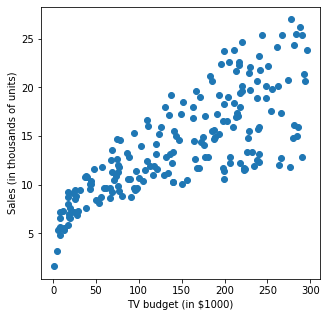

In [ ]:
# following packages required for plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
plt.scatter(df['TV'], df['sales']) # scatter plot
plt.xlabel('TV budget (in $1000)')
plt.ylabel('Sales (in thousands of units)')

The plot indicate a relationship between the two, approximately linear. To arrive at the estimate of the coefficients $a$ and $b$, denoted by $\hat a$ and $\hat b$  we will formulate our goal as:
$$\underset{a, b}{\mathrm{argmin}} \sum_{i=1}^{n} (y^i-\hat y^i)^2$$ where $\{(x^i, y^i)\}_{i=1,2,...n}$ is the given data (called as training data) corresponding to TV budget and sales, and $\hat y^i=\hat a+\hat bx^i$ is the prediction by our model on the training data $x^i$. 

This is a simple calculus problem. Denoting by $RSS$ (Residual sum of Squares) the summation $\sum_{i=1}^{n}(y^i-\hat y^i)^2$, we can find derivatives of $RSS$ w.r.to $a$ and $b$, and equate them to zero to get the solutions. When we do that, we get $$\hat b=\frac{\sum_{i=1}^{n}(x^i-\bar x)(y^i-\bar y)}{\sum_{i=1}^{n}(x^i-\bar x)^2},$$ 

$$\hat a=\bar y - b \bar x$$ where $\bar x$ and $\bar y$ are sample means of $x$ and $y$, respectively.

The line $\hat y=\hat a + \hat b x$ is called as least squares line. The fit is shown below.

The line $y=a+bx$ is called as population regression line. We do not know this line since we do not know the true $a$ and $b$.

Note that $y^i = a+bx^i+\epsilon ^i$ where we assume that $\epsilon ^i$'s are uncorrelated. Further, we assume that all $\epsilon ^i$'s have constant variance $\sigma ^2$. These assumptions are important for the theory behind linear regression. Consequences of violation of this aasumption will be discussed later.

# Fit the linear regression model

Intercept a: 7.03
slope b: 0.05


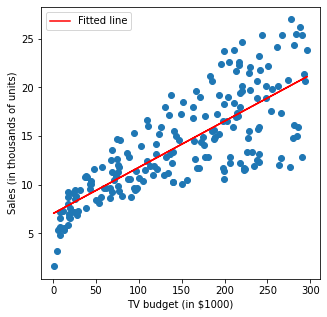

In [ ]:
# we will use linear regression model from scikit-learn (sklearn) package and also from statsmodels package
# here we will use sklearn
# numpy ir required for array processing

from sklearn import linear_model
import numpy as np

lin_reg = linear_model.LinearRegression() # instantiate linear reg object from linear_model module
x = np.array(df["TV"])[:, None] # prepare data; x is nsamples x nfeatures; here it is 200 x 1 (TV advertising budget in 200 markets)
y = np.array(df["sales"]) # y is the observed output (sales) of length 200 (200 markets)
lin_reg.fit(X=x, y=y) # fit the model to the data; i.e find intercept and slope associated with "TV" budget
print(f"Intercept a: {lin_reg.intercept_:.2f}\nslope b: {lin_reg.coef_[0]:.2f}") # extract and print the intercept and coeffcients from the fitted lin_reg object

# predict the fitted model on training data x and plot the line
y_hat = lin_reg.predict(x)
plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.plot(x, y_hat, color='r', label='Fitted line')
plt.xlabel('TV budget (in $1000)')
plt.ylabel('Sales (in thousands of units)')
plt.legend()

# Accuracy of the estimated coefficients

<p style="text-align: justify"> To see how close least squares line will be to the population regression line, lets construct a dataset based on $y=2+3x$ with random perturbations. Here the population regression line is $y=2+3x$. We will estimate least-squares line and plot it. See the code below:</p>

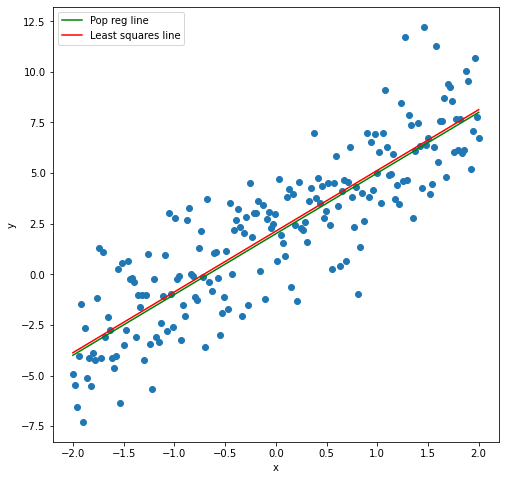

In [ ]:
x1 = np.linspace(start=-2, stop=2, num=200) # 200 values between -2 and 2 equally spaced apart; x1 is a 1-d array of len 200
y1 = 2 + 3*x1 + np.random.normal(0, 2, 200) # y=2+3x+epsilon, the groundtruth responses
x1 = np.expand_dims(x1, axis=1) # make x1 200 x 1 matrix
reg1 = linear_model.LinearRegression() # instantiate lin reg model
reg1.fit(X=x1, y=y1) # fit the model to training data

y1_hat = reg1.predict(x1) # predict the fitted model on training data

plt.figure(figsize=(8, 8))
plt.scatter(x1, y1)
plt.plot(x1, 2+3*x1, color='g', label='Pop reg line')
plt.plot(x1, y1_hat, color='r', label='Least squares line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

<p  style="text-align: justify"> The fit is very close the population regression line. In fact, we can show that, on average, the least squares fit is equal to the population regression line i.e $\hat a$ and $\hat b$ are unbiased estimators of $a$ and $b$, respectively. We can see this in the plot below wherein we generated five different sample sets from $y=2+3x$ using different $\sigma ^2$'s. </p

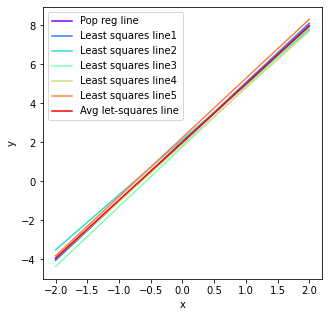

In [ ]:
from matplotlib.pyplot import cm # cm which is colormap is required to give different colors to different fits

x1 = np.linspace(start=-2, stop=2, num=200)
y1 = np.array([2 + 3*x1 + np.random.normal(0, sigma, 200) for sigma in [1, 2, 3, 4, 5]]).T # y1 is 200 x 5
x1 = np.expand_dims(x1, axis=1)
reg1 = linear_model.LinearRegression()
reg1.fit(X=x1, y=y1) # we are fitting 5 models because y1 has 5 columns

y1_hat = reg1.predict(x1) # y1_hat is 200 x 5
y1_hat_avg = np.mean(y1_hat, axis=1) # calculate average response from all 5 fits

plt.figure(figsize=(5, 5))
color = cm.rainbow(np.linspace(0,1,7))
plt.plot(x1, 2+3*x1, color=color[0], label='Pop reg line')

for i in range(5):
  plt.plot(x1, y1_hat[:, i], color=color[i+1], label='Least squares line'+str(i+1))
plt.plot(x1, y1_hat_avg, color=color[-1], label='Avg let-squares line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

The variances of $\hat a$ and $\hat b$ can be computed as $$SE(\hat a)^2=\sigma ^2 [\frac{1}{n}+\frac{\bar x ^2}{\sum _{i=1}^{n}(x^i-\bar x)^2}],$$ 

$$SE(\hat b)^2=\frac{\sigma ^2}{\sum _{i=1}^{n}(x^i-\bar x)^2}$$ where $\sigma ^2$ is variance of $\epsilon$. 

The positive square roots of the above quantities give the standard errors (standard deviations) $SE(\hat a)$ and $SE(\hat b)$, respectively. Since $\sigma$ is not known, we can estimate it from the data as $\sqrt{\frac{RSS}{n-2}}$. This estimate is called as called as residual standard error $RSE$. Denominator has $n-2$ because of two constraints in the form of $\hat a$ and $\hat b$ taking away two degrees of freedom. 

See the code below for estimated standard errors of $\hat a$ and $\hat b$, respectively.

In [ ]:
# for this 1-d case, we will explicitly work this out. When we go to multivariate regression case, we will use statsmodels package since sklearn does not directly give this

# we will compute standard errors for a and b
n = 200
x_bar = np.mean(x)
RSS = np.sum((y - y_hat)**2)
RSE_squared = RSS/(n-2)
SE_a_hat = np.sqrt(RSE_squared*(1./200 + x_bar**2/np.sum((x-x_bar)**2)))
SE_b_hat = np.sqrt(RSE_squared / np.sum((x-x_bar)**2))

print(f"Standard error for a_hat {SE_a_hat:.3f}\t Standard error for b_hat {SE_b_hat:.3f}")

Standard error for a_hat 0.458	 Standard error for b_hat 0.003


<p style="text-align:justify">The estimated standard errors suggest that the estimated coeffcients are reasonably accurate since they are low in comparison to the value of the coefficients. In fact we can find the $95\%$ confidence intervals ($CI$) for the true parameters $a$ and $b$, respectively. To find the confidence interval for $a$, we proceed as follows:</p>

<p style="text-align:justify">The central limit theorem (CLT) crudely states that, as n becomes large, the sampling distribution of $z = \frac {\bar x - \mu}{\sigma / \sqrt n}$ is standard normal, where $\mu$ and $\sigma ^2$ are population mean and variance, and $\bar x$ is sample mean. Suppose $\sigma$ is known and $\mu$ is unknown. Say, we want to find the $95\%$ $CI$ for $\mu$. From the CLT, we have $$P(-1.96 \leq  \frac {\bar x - \mu}{\sigma / \sqrt n} \leq 1.96)=0.95$$
$\implies$ $$P(-1.96 \frac{\sigma}{\sqrt n} \leq \bar x - \mu \leq 1.96 \frac{\sigma}{\sqrt n})=0.95$$
$\implies$ $$P(\bar x -1.96 \frac{\sigma}{\sqrt n} \leq \mu \leq \bar x 1.96 \frac{\sigma}{\sqrt n})=0.95$$
So, $CI=(\bar x -1.96 \frac{\sigma}{\sqrt n}, \bar x +1.96 \frac{\sigma}{\sqrt n})$. Note that the last probability statement may be misread as "probability of $\mu$ lying in the CI is $95\%$". This is wrong since $\mu$ is not a random variable. $\bar x$ is the random variable. So, the actual meaning is that, if we have 100 sets of identically independantly distributed samples, each of size n (large n), and we estimate $CI$ as above with respect to each of the sample set, then $95$ of the $100$ intervals is likely to contain the true parameter $\mu$.</p>

<p style="text-align:justify">When $\sigma$ is unknown, we estimate it from the data denoted by $\hat \sigma$. Then the sampling distribution of $t=\frac {\bar x - \mu}{\hat \sigma}$ follows Student t-distribution with $n-1$ degrees of freedom. This distribution becomes closer and closer to normal when n is large, but for small n, it has thick tails. Under this distribution, $CI$ is estimated to be $(\bar x -t^{*} \sigma, \bar x +t^{*} \sigma)$ where $t^{*}$ is such that $$P(-t^{*} \leq  \frac {\bar x - \mu}{\hat \sigma} \leq t^{*})=0.95$$ In fact, $t^{*}$ is approximately 2.</p>

<p style="text-align:justify">Based on the above discussion, we can estimate $CI$ for $a$ to be approximately $(\hat a - 2SE(\hat a), \hat a + 2SE(\hat a))$. Similarly, $CI$ for $b$ is $(\hat b - 2SE(\hat b), \hat b + 2SE(\hat b))$. These values have been computed and shown below.</p>

In [ ]:
# we will now compute approximate confidence intervals at confidence level 95%
a_hat = lin_reg.intercept_
b_hat = lin_reg.coef_[0]
CI_a = (np.around(a_hat-2*SE_a_hat, 3), np.around(a_hat+2*SE_a_hat, 3))
CI_b = (np.around(b_hat-2*SE_b_hat, 3), np.around(b_hat+2*SE_b_hat, 3))

print(f"Confidence interval for a ({CI_a[0]:.3f}, {CI_a[1]:.3f})")
print(f"Confidence interval for b ({CI_b[0]:.3f}, {CI_b[1]:.3f})")

Confidence interval for a (6.117, 7.948)
Confidence interval for b (0.042, 0.053)


From the above results we can conclude the following for the single variable senario we have been considering:
- In the absence of TV advertising, the sales will fall anywhere between 6117 and 7948 units, most likely ($95\%$). 
- Further, for every $\$1000$ increase in TV advertising budget, the sales will go up by 42 to 53 units, most likely ($95\%$).

<p style="text-align:justify">We have estimated the coefficients, their standard errors and the $95\% CI$ for the true coefficients. But, how significant are these coefficients? i.e, for example, is $\hat b=0.05$ statistically significant or is it actually $0$ i.e does TV budget really influence sales, or is sales independant of TV budget? In order to answer this question, we will do a test of following pair of hypotheses:</p>

Null hypothesis $H_0: \hat b=0$ against

Alternate hypotheis $H_1: \hat b \neq 0$

<p style="text-align:justify">To test this pair, we intially assume $H_0$ is true. Under this assumption, we look at the t-statistic $t=\frac{\hat b-0}{SE(\hat b)}$ value for the data we have in hand. Now, we put the question - "What is the probability that any other random sample of data sampled from the same distribution as the current data, and which is independant of the current data, will give a t-statistic value atleast as large (in the absolute sense) as what is observed now from the current data, under the distribution of $H_0$?" This probability is called as p-value. If the p-value is very small (say $<.05$ i.e $5\%$ significance level i.e $5\%$ room for error of rejecting $H_0$ when actually $H_0$ is true), then the null hypothesis is rejected, and we say $\hat b$ is statistically significant. Similarly, we can proceed for $\hat a$ also.</p> 

We have estimated the p-values in the code below.

In [ ]:
# we will test now if there is relationship between x and y i.e if b_hat = 0 or not
# note that we have got b_hat to be 0.05 based on the current data. If we had got another sample data, would b_hat be non-zero for that as well, or the non-zeroness of b_hat here is by chance.
# null hypothesis H0: b_hat=0
# alternative H1: b_hat!= 0

from scipy import stats # we will use stats package from scipy for p-value computation
t_statistic_b_hat = (b_hat - 0.)/SE_b_hat
p_val_b_hat = 1. - stats.t.cdf(np.abs(t_statistic_b_hat), n-1)

# similarly we can test for a_hat
t_statistic_a_hat = (a_hat - 0.)/SE_a_hat
p_val_a_hat = 1. - stats.t.cdf(np.abs(t_statistic_a_hat), n-1)

print(f"p-value for a {p_val_a_hat:.2f}\tp-value for b {p_val_b_hat:.2f}")

p-value for a 0.00	p-value for b 0.00


The observations are:
- There seems to be a relationship between TV advertising budget and sales (p_val for b is very very small < 0.05).
- Intercept a is not zero (p_value of a is very very small < 0.05) i.e even when TV budget is zero, the average sales is likely to be non-zero.

# Accuracy of the model
<p style="text-align:justify">Since there seems to be a relationship between TV budget and sales (i.e $\hat b=0.05$ is statistically significant), we now want to check the goodness of fit of the estimated model. Note that even if we knew exact values of $a$ and $b$, still we would not be able to exactly get y due to $\epsilon$. Since $\epsilon=N(0, \sigma ^2)$, $y$ has same variance $\sigma ^2$ as $\epsilon$. This variance quantifies how much $y$ deviates from its centre $f(x)$. However, $\sigma ^2$ is unknown. But we can estimate it from data. In fact We have already estimated it as $RSE$ a little earlier. If $RSE$ is high, it indicates that the  model (in our case, linear model) does not fit the data well. The model is not suitable and we may have to explore other non-linear models. A good model should have low RSE. However, if RSE is zero, this means that there is no variability after regression and the model has completely explained the variability in the data. This implies that the model has fit the inherent noise in the data as well. This is called as overfitting. Overfitting will make the generalizability of the model poor.</p>

<p style="text-align:justify">We have computed $RSE$ in the code below. The values is $3.26$. It means that the sales is off from its mean by 3260 units. From the data, we can compute mean of sales to be around $14000$ units. So, the percentage error in the ability of model to fit the data is $3260/14000=23\%$.</p>

<p style="text-align:justify">$RSE$ is an absolute measure. It has the units of $y$. It is not always clear what constitutes a large $RSE$. Instead, we can look at a relative measure called coeffcient of determination, denoted by $R^2$. It is defined as: $$R^2= \frac{TSS-RSS}{TSS}$$ where $TSS=\sum_{i=1}^{n}(y-\bar y)^2$ and $RSS=\sum_{i=1}^{n} (y^i-\hat y^i)^2$. $TSS$ captures the overall variability in the responses before the regression is performed. $RSS$ captures the amount of variability left (residue) after the regression is performed. So, $R^2$ should tell how much variability in the data has been explained by the regression model relative to the original unexplained variability. $R^2$ always lies in $[0, 1]$. Low $R^2$ value indicates model's lack of fit to the data while high $R^2$ value supports the model's ability to fit the data. Again, $R^2$ being $1$ could mean overfitting. </p>

<p style="text-align:justify">We have computed $R^2$ in the code below. $R ^2 \approx 61\%$ means that around 61% of the variability in sales is explained by the TV advertising budget linearly, which is significant. </p

In [ ]:
# we will look at RSS and R^2 - the coefficient of determination to judge the goodness of the fit of the model to the data
# Note that RSE is an absolute measure and will be in the units of y; judging from RSE value the goodness of fit is difficult since it is not always clear what is good RSE value
# R^2 is a relative measure lying in the range [0, 1]; higher its value, better is the fit

# we have already computed RSE_squared earlier
RSE = np.sqrt(RSE_squared)

# we will now compute R^2
y_bar = np.mean(y)
TSS = np.sum((y-y_bar)**2)
R_squared = 1.-RSS/TSS

print(f"TSS {TSS:.3f}\tRSE {RSE:.3f}\tR^2 {R_squared:.3f}")
print(f"y_bar {y_bar}")

TSS 5417.149	RSE 3.259	R^2 0.612
y_bar 14.0225


In [ ]:
# collect all that we have done in one place
pd.set_option("display.precision", 3)
sales_TV_reg = pd.DataFrame(index=['a', 'b'], columns=['val', 'SE', '95% CI', 't-statistic', 'p-value'])
sales_TV_reg.index.name = 'coeff'
sales_TV_reg['val'] = [a_hat, b_hat]
sales_TV_reg['SE'] = [SE_a_hat, SE_b_hat]
sales_TV_reg['95% CI'] = [CI_a, CI_b]
sales_TV_reg["t-statistic"] = [t_statistic_a_hat, t_statistic_b_hat]
sales_TV_reg["p-value"] = [p_val_a_hat, p_val_b_hat]
print(sales_TV_reg)
print("---------------------------------------------------------------")
print(f"RSE of the model: {RSE:.3f}")
print(f"R^2 of the model: {R_squared:.3f}")
print("----------------------------------------------------------------")

         val     SE          95% CI  t-statistic  p-value
coeff                                                    
a      7.033  0.458  (6.117, 7.948)       15.360      0.0
b      0.048  0.003  (0.042, 0.053)       17.668      0.0
---------------------------------------------------------------
RSE of the model: 3.259
R^2 of the model: 0.612
----------------------------------------------------------------


# Multivariate regression
<p style="text-align: justify"> Why multivariate regression? Can't we do single variable regression of sales against radio advertising budget  and sales against newspaper advertising budget like how we regressed sales against TV budget? Would that not suffice to get an overall understanding of the problem, and suggest a marketing plan? Let's try.</p>

In [ ]:
# a function to compute all regression statistics we have looked at so far

def reg_stats(x, y): 
  df = pd.DataFrame(index=['a', 'b'], columns=['val', 'SE', '95% CI', 't-statistic', 'p-value'])
  n = x.shape[0]
  
  reg = linear_model.LinearRegression()
  reg.fit(X=x, y=y) 
  y_hat = reg.predict(x)
  a_hat = reg.intercept_
  b_hat = reg.coef_[0]
 
  x_bar = np.mean(x)
  RSS = np.sum((y - y_hat)**2)
  RSE_squared = RSS/(n-2)
  SE_a_hat = np.sqrt(RSE_squared*(1./200 + x_bar**2/np.sum((x-x_bar)**2)))
  SE_b_hat = np.sqrt(RSE_squared / np.sum((x-x_bar)**2))

# we will now compute approximate confidence intervals at confidence level 95%
  CI_a = (np.around(a_hat-2*SE_a_hat, 3), np.around(a_hat+2*SE_a_hat, 3))
  CI_b = (np.around(b_hat-2*SE_b_hat, 3), np.around(b_hat+2*SE_b_hat, 3))

  # we will test now if there is relationship between x and y i.e if b = 0 or not
  # note that we have got b to be 0.05 based on the current data. If we had got another sample data, would b be non-zero for that as well, or the non-zeroness of b here is by chance.
  # null hypothesis H0: b=0
  # alternative H1: b!= 0
  t_statistic_b_hat = (b_hat - 0.)/SE_b_hat
  p_val_b_hat = 1. - stats.t.cdf(np.abs(t_statistic_b_hat), n-1)

  # similarly we can test for a
  t_statistic_a_hat = (a_hat - 0.)/SE_a_hat
  p_val_a_hat = 1. - stats.t.cdf(np.abs(t_statistic_a_hat), n-1)

  # RSE
  RSE = np.sqrt(RSE_squared)

  #we will now compute R^2
  y_bar = np.mean(y)
  TSS = np.sum((y-y_bar)**2)
  R_squared = 1.-RSS/TSS

  df.index.name = 'coeff'
  df['val'] = [a_hat, b_hat]
  df['SE'] = [SE_a_hat, SE_b_hat]
  df['95% CI'] = [CI_a, CI_b]
  df["t-statistic"] = [t_statistic_a_hat, t_statistic_b_hat]
  df["p-value"] = [p_val_a_hat, p_val_b_hat]

  return y_hat, df, RSE, R_squared

         val     SE           95% CI  t-statistic  p-value
coeff                                                     
a      9.312  0.563  (8.186, 10.437)       16.542      0.0
b      0.202  0.020   (0.162, 0.243)        9.921      0.0
---------------------------------------------------------------
RSE of the model: 4.275
R^2 of the model: 0.332
----------------------------------------------------------------


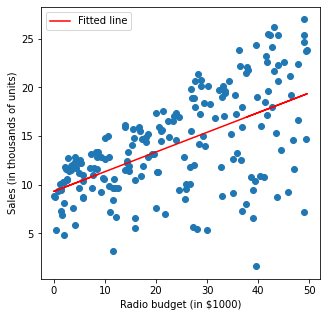

In [ ]:
# regress sales against radio budget
x = np.array(df["radio"])[:, None] 
y = np.array(df["sales"]) 
y_hat, sales_radio_reg, RSE, R_squared = reg_stats(x, y)

print(sales_radio_reg)
print("---------------------------------------------------------------")
print(f"RSE of the model: {RSE:.3f}")
print(f"R^2 of the model: {R_squared:.3f}")
print("----------------------------------------------------------------")

plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.plot(x, y_hat, color='r', label='Fitted line')
plt.xlabel('Radio budget (in $1000)')
plt.ylabel('Sales (in thousands of units)')
plt.legend()

          val     SE            95% CI  t-statistic    p-value
coeff                                                         
a      12.351  0.621  (11.109, 13.594)       19.876  0.000e+00
b       0.055  0.017    (0.022, 0.088)        3.300  5.736e-04
---------------------------------------------------------------
RSE of the model: 5.092
R^2 of the model: 0.052
----------------------------------------------------------------


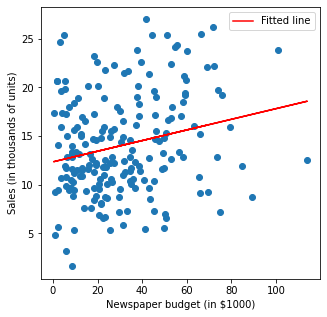

In [ ]:
# regress sales against newspaper budget
x = np.array(df["newspaper"])[:, None] 
y = np.array(df["sales"]) 
y_hat, sales_newspaper_reg, RSE, R_squared = reg_stats(x, y)

print(sales_newspaper_reg)
print("---------------------------------------------------------------")
print(f"RSE of the model: {RSE:.3f}")
print(f"R^2 of the model: {R_squared:.3f}")
print("----------------------------------------------------------------")

plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.plot(x, y_hat, color='r', label='Fitted line')
plt.xlabel('Newspaper budget (in $1000)')
plt.ylabel('Sales (in thousands of units)')
plt.legend()

<p style="text-align:justify">We see that both sets of coefficients, w.r.to radio and newspapers are statistically significant (p-values very small) non-zero values. In fact, the $b$ value for newspaper budget is similar to the one for TV budget. However, newspaper advertising explains only 5% of the sales ($R^2=0.05$). So, where is the problem? We can find the problem by doing multivariate regression. </p>

<p style="text-align:justify">In multivariate regression, in our case, $f(x)=a + b_1x_1 + b_2x_2 + b_3x_3$. To find the coefficients, we solve:$$\underset{a, b_1, b_2, b_3}{\mathrm{argmin}}RSS=\underset{a, b_1, b_2, b_3}{\mathrm{argmin}} \sum_{i=1}^{n} (y^i-\hat y^i)^2$$ This can be rephrased into matrix form as follows:
Let $X$ be the $n \times 4$ matrix whose first column is vector of ones, and the subsequent three columns are $\{x_1^i\}_{i=1,2,...,n}$, $\{x_2^i\}_{i=1,2,...,n}$ and $\{x_3^i\}_{i=1,2,...,n}$. Let $y$ be the column vector of $y^i$'s. Let $c$ be the column vector with components $a$, $b_1$, $b_2$ and $b_3$, in order. Then the set of equations $y^i=a + b_1x_1^i + b_2x_2^i + b_3x_3^i+\epsilon ^i$, $i=1, 2,...,n$ can be written as $y=Xc+\epsilon$ where $\epsilon$ is the column vector of $\epsilon ^i$'s. From here, the above problem simplifies to: $$\underset{a, b_1, b_2, b_3}{\mathrm{argmin}}[(y-Xc)^T(y-Xc)]$$ Under the assumption that $n \ge 4$ and $X$ is full rank, the unique solution is: $$c=(X^TX)^{-1}X^Ty$$ It is important that the number of samples is equal or preferably larger than the number of predictor variables, or else there does not exist a unique solution. Further, when $X$ is not full rank, some of the predictors are linearly dependant. In this case it may be difficult to separate out the influence of each predictor in the set of dependant predictors on the response.This problem is called as collinearity problem, which we will look at it later.</p>

We perform the multivariate regression on the advertisement data in the code below.

In [ ]:
# we can use sklearn's linear_model module to do multivariate regression as we have done above. But we will use statsmodels package since it gives all associated information in one go
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 10)

#training data
X = df.drop("sales", axis=1)
X = sm.add_constant(X) # prepend a column of 1's for intercept
y = df["sales"]

multi_lin_reg = sm.OLS(endog=y, exog=X) #instantiate the multivariate lin reg model
results = multi_lin_reg.fit() # fit the model

y_hat = np.array(X)@np.array(results.params).reshape(-1, 1) # predict on trianing data y = Xc
RSS = np.sum((np.array(y)[:, None] - y_hat)**2)
RSE = np.sqrt(RSS/(n-4))

# collect all statistics in one place and print it
# observe carefully to appreciate how results object contains all the information about the fit
multi_lin_reg_df = pd.DataFrame(index=['a', 'b1', 'b2', 'b3'], columns=['val', 'SE', '95% CI', 't-statistic', 'p-value'])
temp_dict = {"val":results.params.values, 'SE':results.bse.values, 't-statistic':results.tvalues.values, '95% CI':list(np.around(results.conf_int().values, decimals=3)), 
             'p-value':np.around(results.pvalues.values, decimals=3)}
multi_lin_reg_df = pd.DataFrame.from_dict(temp_dict)
multi_lin_reg_df.index=['a', 'b1', 'b2', 'b3']
multi_lin_reg_df.index.name = 'coeff'
print(multi_lin_reg_df)
print("---------------------------------------------------------------")
print(f"RSE of the model: {RSE:.3f}")
print(f"R^2: {results.rsquared:.3f}")
print("---------------------------------------------------------------")

         val     SE  t-statistic           95% CI  p-value
coeff                                                     
a      2.939  0.312        9.422   [2.324, 3.554]     0.00
b1     0.046  0.001       32.809   [0.043, 0.049]     0.00
b2     0.189  0.009       21.893   [0.172, 0.206]     0.00
b3    -0.001  0.006       -0.177  [-0.013, 0.011]     0.86
---------------------------------------------------------------
RSE of the model: 1.686
R^2: 0.897
---------------------------------------------------------------


<p style="text-align:justify">$RSS$ and $RSE$ are computed as described earlier with the only change being that $y^i$ has $4$ terms now in comparison to $2$ in the single variable model. Similarly, $SE$'s, t-statistic values, $95\%$ $CI$'s and p-values are computed. Note that t-statistic is used to test the significance of a single coefficient i.e, say, if $b_i=0$ or not, irrespective of whether it is single variable or multivariate regression. </p>

<p style="text-align:justify">We can see in the multi-variate regression that though $b_1$ (TV budget slope) and $b_2$ (radio budget slope) are similar to what we obtained in single variable regressions, $b_3$ (newspaper budget slope) is different and the corresponding p-value is also high ($0.86$). To understand further, let's look at the correlations between all pairs among TV budget, radio budget and newspaper budget, respectively.</p>

In [ ]:
df.corr() # gives pairwise correlation of all numerical columns in the data frame

,TV,radio,newspaper,sales
TV,1.000,0.055,0.057,0.782
radio,0.055,1.000,0.354,0.576
newspaper,0.057,0.354,1.000,0.228
sales,0.782,0.576,0.228,1.000


<p style="text-align:justify">We can see that newspaper budget and radio budget are correlated ($0.354$). Even though this correlation is not very significant, it is also not negligible. Since radio budget influences sales significantly (it has staistically significant non-zero slope i.e. $b_2=0.189$ with very low p-value) and since newspaper budget correlates significantly with radio budget, this means that in whichever market radio advertising was promoted, the newspaper advertising was also promoted there to some level, and the increase in sales due to radio budget was reflected in the single variable regression of sales against newspaper budget. So, when multiple variables are involved, multivariate regression is preferred. We will see another example of this kind of scenario in the next chapter. Also, when we do separate single variable regressions, the way to combine multiple one variable models is not clear for making predictions.</p>

<p style="text-align:justify">Now, let's interpret the results of multivariate regression. $b_1=0.046$ means that for a fixed radio budget and newspaper budget, every $\$1000$ increase in TV budget increases sales by 46 units, on average. Similarly $b_2=0.189$ means that for a fixed TV budget and newspaper budget, every $\$1000$ increase in radio budget increases sales by 189 units, on average. This interpretation is different from the single variable case wherein when we talk about sales against radio budget, we completely ignore other budgets.</p>

<p style="text-align:justify">Further, $R^2$ is quite high ($0.89$) in the multivariate case suggesting a multivariate relationship between sales and TV, radio advertising.</p>

<p style="text-align:justify">We know from the above results that both TV budget and radio budget influence sales because the corresponding coefficients have very t-statistic values and consequently low p-values. However, in a multivariate scenario we can also simultaneously test if a subset of predictors are statistically significant or not i.e for example, we can test:

$H_0$: $b_1=b_2=0$ against

$H_1$: atleast one of $b_1$ or $b_2$ not zero

In general, we can test:

$H_0$: $b_1=b_2=...=b_q=0$ against

$H_1$: atleast one of $b_j$ not zero where $j=1,2,...,q$

Here $q \le p$ where $p$ is the number of predictors in the multivariate model. The way we proceed to test this pair of hypotheses is as follows:</p>

<p style="text-align:justify">We will assume $H_0$ is true. Then, $f(x)=a+b_{q+1}+...+b_p$ where we assume without loss of generality that the coefficients are reordered so that the first $q$ coeffcients are $b_1$ to $b_q$. The regression under this scenario is called as restricted regression since we are restricting $b_1$ to $b_q$ to zero. We compute $RSS$ in this scenario and denote it by $RSS_R$. We also compute the $RSS$ in the unrestricted case and denote it by $RSS_{UR}$. Clearly, $RSS_{R} - RSS_{UR} \ge 0$ because when we add more predictors to explain the response, the squared error cannot grow more. Now, the question is how significant is the difference $RSS_R -RSS_{UR}$? Naturally, if the difference is significant, $H_0$ should be rejected. To answer the question, we will convert the difference to a statistic with a known probability distribution. Then we can compute the p-value and qualify the significance. Firstly, note that the difference has units of $y$. We will make it unitless by dividing by $RSS_{UR}$. Then we divide numerator by $q$ and denominator by $n-p-1$ to make the distribution of the statistic a valid probability distribution. The resulting statistic is
$$F= \frac{(RSS_{R} - RSS_{UR})\mathbin{/}q}{RSS_{UR}\mathbin{/}(n-p-1)}$$

which has standard F-distribution with $q$ and $n-p-1$ degrees of freedom.

We have computed the F-statistic and the corresponding p-value to test 

$H_0$: $b_1=b_2=b_3=0$ against

$H_1$: atleast one of $b_1$ or $b_2$ or $b_3$ not zero

in the code below.</p>


In [ ]:
n = 200
p = 3
q = 3

# restricted regression
X = df.drop(["sales", "TV", "radio", "newspaper"], axis=1)
X = sm.add_constant(X) # prepend a column of 1's for intercept
y = df["sales"]

multi_lin_reg = sm.OLS(endog=y, exog=X)
results = multi_lin_reg.fit()
y_hat = np.array(X)@np.array(results.params).reshape(-1, 1)
RSS_R = np.sum((np.array(y)[:, None] - y_hat)**2)

# we already have RSS_UR which is nothing but the RSS computed earlier with the full model
RSS_UR = RSS

#F-statistic
F_statistic = ((RSS_R - RSS_UR)/q) / (RSS_UR/(n-p-1))
#p-value
p_val= 1. - stats.f.cdf(F_statistic, q, n-p-1)

print(f"RSS_R: {RSS_R:.3f}\tRSS_UR: {RSS_UR:.3f}\tF-statistic: {F_statistic:.3f}\tp-value: {p_val:.3f}")

RSS_R: 5417.149	RSS_UR: 556.825	F-statistic: 570.271	p-value: 0.000


<p style="text-align:justify">It is clear from the above result that $H_0$ is to be rejected since the p-value is too small. This means that advertising through media (TV, radio, newspaper) influences the sales of the product. We also know from our earlier t-statistic values that TV and radio have statistically significant influence on sales. So, the natural question is, when we already have t-statistic values, why do we need F-statistic values? The reason is follows: Since we are assuming a significance level at $100\alpha \%$ when do hypothesis testing, there is a $100\alpha \%$ chance that we will reject $H_0$ erroneously when actually it is true i.e there is a $100\alpha \%$ chance that p-value will be very small  erroneously. Now, when the number of predictors increases, even though if $H_0$ is true (i.e there is no relationship between any predictor and the response variable), still, the likelihood of atleast one p-value based on t-statistic being very small increases due to the $100\alpha\%$ significance level with respect to t-statistic computed for every predictor. This does not happen with F-statistic since it adjusts for the number of predictors (i.e the degrees of freedom for F-statistic in the numerator and denominator is based on the number of predictors). Hence, when large number of predictors are involved, F-statistic is more reliable to check if there is relationship between a subset of predictors and response than individual t-statistic values.</p>

We can directly get the F-statistic from the statsmodels package, without explicitly computing as above. This is shown in the code below. 

In [ ]:
X = df.drop("sales", axis=1)
X = sm.add_constant(X) # prepend a column of 1's for intercept
y = df["sales"]

multi_lin_reg = sm.OLS(endog=y, exog=X)
results = multi_lin_reg.fit()

A = np.identity(len(results.params))
A = A[1:,:]
print(results.f_test(A))

<F test: F=array([[570.27070366]]), p=1.575227256092208e-96, df_denom=196, df_num=3>


## Variable selection in multivariate regression
<p style="text-align:justify">Which are the important predictor variables? Using F-statistic we can check if a group of predictor variables influences the response or not. But, which members of the group are important? For example, in the analysis above, we found using F-statistic that media definitely influences sales. We also found that newspaper medium is not influential, using its t-statistic value. In this case, since we had only 3 predictors (a small number)interpretation based on t-statistic is fine. However, we also argued above that when the number of predictors are large, t-statistics are not reliable. So, how do we find the important predictors? Let's answer this.</p>

<p style="text-align:justify">Suppose p=2. Then there are 4 models possible: (i) $b_1=b_2=0$, (ii) $b_1=0$, (iii) $b_2=0$ and (iv) $b_1 \ne0$, $b_2 \ne 0$. To judge which model is the best (which will also tell which predictors should be considered), we can use critreia like Bayesian Information Criterion (BIC), Akaike Information Criterion (AIC), adjusted $R^2$ etc. We will see them later. However, when p is large, then the number of models becomes exponentially large ($2^p$), and these criteria becomes computationally intractable.</p>

<p style="text-align:justify">Another way is to build the model iteratively using forward selection or backward selection or mixed selection. In forward selection, we start with zero predictors. Then for each predictor, we separtely perform a linear regression, totalling to p one variable linear regressions. We choose the one for which the model has the lowest RSS. Now that we have a single variable model, we repeat the process, performing $p-1 \choose 2$ 2-variate linear regressions, and again choose the model with lowest RSS. We continue this until some stopping criteria is satisfied. In backward selection, we start with all the p predictors. Then we remove one predictor at a time iteratively. The predictor removed has the largest p-value in terms of its t-statistic. We continue this until some stopping criteria is satisfied. Obviously, backward  selection is infeasible when $p \gt n$ since we cannot even fit the least squares model. We have to do dimensionality reduction, which we will discuss later. In mixed selection, we start with forward selection. Generally, p-values (in terms of t-statistic) of coefficients increases as p increases. So, if at any iteration, the p-value of an added predictor goes beyond a threshold, we perform backward selection by removing that predictor. We continue this procedure until all predictors added to the model have low p-values and others have large p-values.</p>

## Model fit in multivariate regression
<p style="text-align:justify"> As discussed earlier, we will use $RSE$ and $R^2$ to assess the goodness of fit of the model. First, we will look at $R^2$. We have seen above that only TV budget explains $61\%$ of the varince in the data. When we add radio budget, $R^2$ goes upto $89.72\%$ (see the code below), a significant jump. However, when we further add newspaper budget, $R^2$ increases by a negligible amount (see code below). Hence newspaper budget can be dropped from the model. Adding it may only fit noise in the data, resulting in overfitting. Note that adding more variables into the model always increases $R^2$, as each addition causes some residual variance in the data to be explained.</p>

<p style="text-align:justify"> In terms of $RSE$, the model with only TV budget reported $3.26$. When we add radio budget, $RSE$ decreased to $1.681$ (see code below). When we further added newspaper budget to the model, $RSE$ increased to $1.686$ (see code below). This again suggests that newspaper budget need not be considered.</p>

In [ ]:
# TV budget vs sales
X = df.drop(["sales", "radio", "newspaper"], axis=1)
X = sm.add_constant(X) # prepend a column of 1's for intercept
y = df["sales"]
multi_lin_reg = sm.OLS(endog=y, exog=X)
results = multi_lin_reg.fit()
y_hat = np.array(X)@np.array(results.params).reshape(-1, 1)
RSS = np.sum((np.array(y)[:, None] - y_hat)**2)
RSE_TV = np.sqrt(RSS/(n-2))
R_squared_TV = results.rsquared

# TV budget and radio budget vs sales
X = df.drop(["sales", "newspaper"], axis=1)
X = sm.add_constant(X) # prepend a column of 1's for intercept
y = df["sales"]
multi_lin_reg = sm.OLS(endog=y, exog=X)
results = multi_lin_reg.fit()
y_hat = np.array(X)@np.array(results.params).reshape(-1, 1)
RSS= np.sum((np.array(y)[:, None] - y_hat)**2)
RSE_TV_radio = np.sqrt(RSS/(n-3))
R_squared_TV_radio = results.rsquared

# all 3 budgets vs sales
X = df.drop("sales", axis=1)
X = sm.add_constant(X) # prepend a column of 1's for intercept
y = df["sales"]
multi_lin_reg = sm.OLS(endog=y, exog=X)
results = multi_lin_reg.fit()
y_hat = np.array(X)@np.array(results.params).reshape(-1, 1)
RSS = np.sum((np.array(y)[:, None] - y_hat)**2)
RSE_all = np.sqrt(RSS/(n-4))
R_squared_all = results.rsquared

print(f"RSE_TV:{RSE_TV:.3f}\tRSE_TV_radio:{RSE_TV_radio:.3f}\tRSE_all:{RSE_all:.3f}")
print(f"RSS_TV:{R_squared_TV:.5f}\tRSS_TV_radio:{R_squared_TV_radio:.5f}\tRSS_all:{R_squared_all:.5f}")

RSE_TV:3.259	RSE_TV_radio:1.681	RSE_all:1.686
RSS_TV:0.61188	RSS_TV_radio:0.89719	RSS_all:0.89721


## Model predictions in multivariate linear regression
<p style="text-align:justify"> Once we have the coefficients, for any given $x=(x_1, x_2, ..., x_p)$, we can compute the prediction $\hat y=a+b_1x_1+...+b_px_p$. How good is this prediction? Note that if the model assumption itself is wrong (say if the actual model is not linear), then we cannot expect the prediction to be good. This is called as model bias. The model bias is reducible by choosing a better model.</p>

<p style="text-align:justify"> Now, how accurate is the prediction $\hat y$ for the given $x$? There are two ways to quantify this. One - we can look at the $CI$ of the average response for the given $x$ i.e $E[y|x]$. Note that $\hat y$ is an estimate of $E[y|x]$. Using this estimate we can find the $CI$ for true $E[y|x]$. Two - the interval in which the true prediction $y$ for the given $x$ is likely to fall.This interval is called as prediction interval ($PI$). $PI$'s are like confidence intervals but they are called differently because $CI$ terminology is used when we find the uncertainity range for a parameter using its estimator while in prediction interval for response, response is not a parameter. In either case, the interval is found as 'certain number' of respective standard deviations from $\hat y$ where the 'certain number' is a t-value that depends on the confidence level we choose.</p>

<p style="text-align:justify">How do we find the SE($\hat y$) when we want to find $CI$ for $E[y|x]$? Intuitively, we can look at the variance of all the responses for the given $x$ in the data. For example, if the given TV budget is $\$ 10K$ and radio budget is $\$ 5K$ (we are assuming newspaper budget is not part of the model), then we look at all the markets where this budget is used and find the variance of sales at those markets. Positive square root of this variance should give SE($\hat y$). Theoritically, assuming a single predictor model for simplicity, it can be computed using:
$$SE(\hat y) = RSE \sqrt{\frac{1}{n} + \frac{(x - \bar x)^2}{\sum_{i=1}^{n}{(x^i-\bar x)}^2}}$$ where $x$ is the given predictor value, $x^i$'s are predictor values given in the data and $\bar x$ is the mean of predictor values given in the data. This can be generalized for multiple predictors. But we will always use software for this as shown in the code below.</p>

<p style="text-align:justify">How do we find the SE($\hat y$) when we want to find $PI$ for $y$? Intuitively, we can build the regression models for different sets of samples from the same population. Using each model we can predict $\hat y$ for the given $x$ and compute the variance among all the $\hat y$'s. Positive square toot of this variance will give SE($\hat y$). Theoritically, assuming a single predictor model for simplicity, it can be computed using:
$$SE(\hat y) = RSE \sqrt{1+ \frac{1}{n} + \frac{(x - \bar x)^2}{\sum_{i=1}^{n}{(x^i-\bar x)}^2}}$$  This can be generalized for multiple predictors. But we will always use software for this as shown in the code below.</p>


In [ ]:
# confidence interval for E[y|x] and prediction interval for y given x

# First we will fit the model to the training data
X = df.drop(["sales", "newspaper"], axis=1)
X = sm.add_constant(X) # prepend a column of 1's for intercept
y = df["sales"]
multi_lin_reg = sm.OLS(endog=y, exog=X)
results = multi_lin_reg.fit()

#Now, let's predict for TV budget = $100,000 and radio budget = $20,000
x_new = np.array([1., 100., 20.])
predictions = results.get_prediction(x_new)

# get confidence and prediction intervals
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,11.256,0.138,10.985,11.528,7.93,14.583


<p style="test-align:justify">Let's interpret the result. Given TV budget $=\$100K$ and radio budget $=\$20K$, $95\%$ of the intervals that arise like the one $[10985, 11528]$ we have got here for the current sample of data will contain the the average sales across all the markets. Further, given TV budget $=\$100K$ and radio budget $=\$20K$ for a particular market, $95\%$ of the intervals that arise like the one $[7930, 14583]$ we have got here for the current sample of data will contain the true sales value.</p>

# Other considerations
## Qualitative predictors
All the predictors in the example we have been working with are continous valued or quantitative predictors. Suppose we also had a predictor called 'nature' of the market qualified as rural or urban. In this case we can quantify the nature attribute by creating a dummy variable $x_4$ as:
$$x_4= \begin{cases}0 & \text{if urban market} \\ 1 & \text{if rural market} \end{cases} $$ If the number of levels were more than two - say the nature of the market can be rural, semi-urban or urban. In this case, we can create two dummy variables $x_{41}$ and $x_{42}$ and quantify the nature attribute as: $$x_{41}= \begin{cases}0 & \text{if urban market} \\ 1 & \text{if not urban market} \end{cases} $$ and $$x_{42}= \begin{cases}0 & \text{if semi-urban market} \\ 1 & \text{if rural market} \end{cases} $$ In general, when the qualitative predictor has $v$ categories, we have to introduce $v-1$ numeric predictor variables to quantify the predictor. Regression results are unaffected by the order of assignment of $0$ and $1$ to the categories of the qualitative predictor. However, the interpretation of regression coefficients will differ when the order changes.

## Non-linearity
Let's look at the following 3-d plot of the data: (TV_budget, radio budget) vs sales. See the code below

In [ ]:
import plotly.express as px # another python graphics package for plotting
import plotly.graph_objects as go

lin_reg = linear_model.LinearRegression()
X = np.array(df[["TV", "radio"]])
y = np.array(df["sales"])
lin_reg.fit(X=X, y=y) 

x_min, x_max = df.TV.min(), df.TV.max()
y_min, y_max = df.radio.min(), df.radio.max()
xrange = np.arange(x_min, x_max)
yrange = np.arange(y_min, y_max)
xx, yy = np.meshgrid(xrange, yrange)

#xx, yy = np.meshgrid(range(351), range(61))
zz = lin_reg.intercept_ + lin_reg.coef_[0]*xx + lin_reg.coef_[1]*yy


# Generate the plot
fig = px.scatter_3d(df, x='TV', y='radio', z='sales')
fig.update_traces(marker=dict(size=3))
fig.add_traces(go.Surface(x=xx, y=yy, z=zz, name='Regression plane'))
fig.show()

<p style="text-align:justify">We can clearly see from the above plot that the fitted regression plane is at $45^{\circ}$ to TV-radio plane. Further, for the data points where the budget is split between TV and radio (i.e points on top of the plane where TV budget is almost equal to radio budget), the fit has slightly underestimated their sales. However, for the data points where one of the budget has dominated the other (many points below the plane), there is a significant overestimation. This suggests that there is non-linearity in the data, due to interaction between TV and radio budget. So, adding an interaction term in the model could be beneficial. Let's try the following $f(x)$:
$$f(x)=a+b_1x_1+b_2x_2+b_4x_1x_2$$ We have left out newspaper budget from the model. Note that the interaction term introduces a non-linear relationship between media budget and sales. Mathematically, the model is still linear since linearity in linear model is with respect to coefficients and not the data attributes/predictors. In fact we can add non-linear predictors like $x_1^2$ or a non-linear function $g(x_1, x_2)$ etc. If $g$ is a polynomial, we will call the regression polynomial regression. Note that when we have non-linear predictors, the interpretation of such predictors and their corresponding coefficients become difficult. </p>

Let's fit this model in the code below.

In [ ]:
X = df.drop(["sales", "newspaper"], axis=1)
X = sm.add_constant(X) # prepend a column of 1's for intercept
X["TV_radio"] = df["TV"]*df["radio"] # add interaction term to the data matrix
y = df["sales"]
multi_lin_reg = sm.OLS(endog=y, exog=X)
results = multi_lin_reg.fit()
y_hat = np.array(X)@np.array(results.params).reshape(-1, 1)
RSS= np.sum((np.array(y)[:, None] - y_hat)**2)
RSE = np.sqrt(RSS/(n-4))
R_squared = results.rsquared

multi_lin_reg_df = pd.DataFrame(index=['a', 'b1', 'b2', 'b4'], columns=['val', 'SE', '95% CI', 't-statistic', 'p-value'])
temp_dict = {"val":results.params.values, 'SE':results.bse.values, 't-statistic':results.tvalues.values, '95% CI':list(np.around(results.conf_int().values, decimals=3)), 
             'p-value':np.around(results.pvalues.values, decimals=3)}
multi_lin_reg_df = pd.DataFrame.from_dict(temp_dict)
multi_lin_reg_df.index=['a', 'b1', 'b2', 'b4']
multi_lin_reg_df.index.name = 'coeff'
print(multi_lin_reg_df)
print("---------------------------------------------------------------")
print(f"RSE of the model: {RSE:.3f}")
print(f"R^2: {results.rsquared:.3f}")
print("---------------------------------------------------------------")

         val         SE  t-statistic          95% CI  p-value
coeff                                                        
a      6.750  2.479e-01       27.233  [6.261, 7.239]    0.000
b1     0.019  1.504e-03       12.699  [0.016, 0.022]    0.000
b2     0.029  8.905e-03        3.241  [0.011, 0.046]    0.001
b4     0.001  5.242e-05       20.727  [0.001, 0.001]    0.000
---------------------------------------------------------------
RSE of the model: 0.944
R^2: 0.968
---------------------------------------------------------------


<p style="text-align:justify"> Clearly, the model with the interaction term is much superior than the former one. Let's interpret the model. We have now
$$sales = 6750 + 19*\text{TV_budget} + 29*\text{radio budget} + \text{TV_budget}*\text{radio_budget}$$ which simplifies to $$sales = 6750 + (19+\text{radio_budget})*\text{TV_budget} + 29*\text{radio budget}$$ What this means is that, given a fixed radio budget, for $\$1000$ increase in TV budget, sales will up by $19+\text{radio budget}$ units. $b_4$ can be interpreted as increase in the effectiveness of radio advertising for a $\$1000$ increase in TV advertising. So, if the available budget in a market can be split between TV and radio, improvement in sales would be significant. </p>

<p style="text-align:justify">Note that $R^2$ has gone up from $0.89719$ to $0.968$, amounting to $\frac{0.968  - 0.89719}{1-0.89719}=69\%$ additional explanation of variability in the data that was left after fitting the data by the model without the interaction term (i.e the additive model). Interactions can arise between qualitative variableas also.</p>

<p style="text-align:justify">A question may arise that if the interaction term $x_1x_2$ is present, why do we need individual terms for $x_1$ and $x_2$? A general principle called hierarchical principle states that if interaction $x_1x_2$ is included, then the main effects ($x_1$ and $x_2$) should also be included. We will not delve deep into this.</p>

# Potential problems in linear regression
## Non-linearity of data
<p style="text-align:justify"> We just discussed about this. We used the plot to infer the non-linearity. And we saw how adding the interaction term significantly improved the model. Another useful way of infering non-linearity is using residual plots. </p>
<p style="text-align:justify"> Let the residual for the $i^{th}$ sample $y^i-\hat {y^i}$ be denoted by $e^i$. In single variable linear regression, we can plot $x^i$ vs $e^i$. In multivariate linear regression, since there are multiple predictors, we can plot $\hat{y^i}$ vs $e^i$. These plots are called as residual plots. If the actual relationship between the predictors and the response is linear, we should not be observing any significant pattern in the residual plot. Or else, the plot suggests presence of non-linearity in the data.
Let's display the residual plots - one for our original additive model without newspaper budget and the other for the model with the interaction term.</p>

Text(0, 0.5, 'residual')

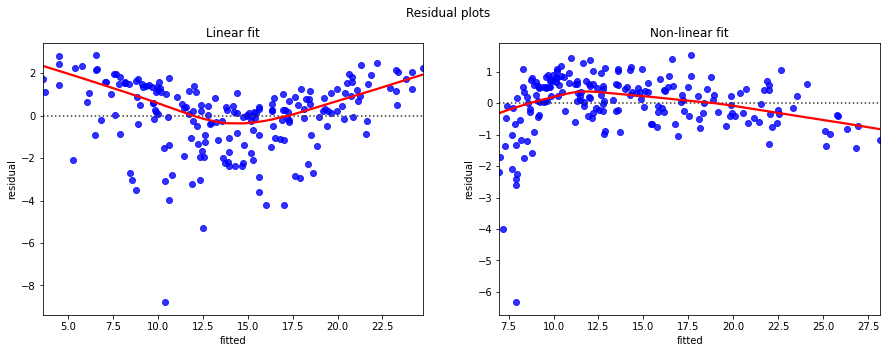

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Residual plots')

# original additive model
X = df.drop(["sales", "newspaper"], axis=1)
X = sm.add_constant(X) # prepend a column of 1's for intercept
y = df["sales"]
multi_lin_reg = sm.OLS(endog=y, exog=X)
results = multi_lin_reg.fit()
y_hat = np.array(X)@np.array(results.params).reshape(-1, 1)
sns.residplot(ax=ax[0], x=y_hat.ravel(), y=y-y_hat.ravel(), lowess=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"}) # using seaborn's residdual plot method
ax[0].set_title('Linear fit')
ax[0].set_xlabel('fitted')
ax[0].set_ylabel('residual')

# model with interaction term
X = df.drop(["sales", "newspaper"], axis=1)
X = sm.add_constant(X) # prepend a column of 1's for intercept
X["TV_radio"] = df["TV"]*df["radio"]
y = df["sales"]
multi_lin_reg = sm.OLS(endog=y, exog=X)
results = multi_lin_reg.fit()
y_hat = np.array(X)@np.array(results.params).reshape(-1, 1)
sns.residplot(ax=ax[1], x=y_hat.ravel(), y=y-y_hat.ravel(), lowess=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax[1].set_title('Non-linear fit')
ax[1].set_xlabel('fitted')
ax[1].set_ylabel('residual')

<p style="text-align:justify">The left plot displays a pattern (in the form a 'v'), suggesting non-linearity in the data and that linear model is not appropriate. The red line running on top of the blue scatter points is a smooth fit of the blue points.  The right plot too has some pattern towards the left corner of the plot, suggesting that the model could possibly be improved further. But it is significantly less compared to the left one indicating that it is superior to the additive model. Note that the pattern in the right plot is around the area where sales is low but overestimated by the model.</p>

## Correlation of $\epsilon ^i$'s
<p style="text-align:justify">We had mentioned right in the beginning that $\epsilon ^i$'s must be uncorrelated. If not, the standard errors of the regression coefficients will underestimate the true error, $CI$'s will become narrower, p-values will be underestimated - all these wrongly suggesting relationship between predictors and the response. For example, assume that all the data is duplicated. Then we have $2n$ samples. However, the duplicates $(x^i, y^i)$ and $(x^j, y^j)$ will have same error $\epsilon ^i$. So, $n$ errors are correlated. In this case, even though the estimated coefficients are same implying that the standard errors also should be the same, the computed standard errors will have a $2n$ in place of $n$, thereby reducing it and consequently narrowing $CI$'s by a factor of $\sqrt 2$ and reducing the p-values.</p>

<p style="text-align:justify">The correlated errors especially occur in time series analysis. At adjacent time instances, the response will be similar resulting in correlated errors. This can be diagnosed using the residual plots we discussed above. If errors are correlated, then there will be pattern/trend in the residual plot i.e for example, we will find different residual trends for different time periods. So, we have to make sure that when we collect data, errors are not correlated.</p>

## Non-constant variance of $\epsilon ^i$'s
<p style="text-align:justify"> If the variance of $\epsilon ^i$'s vary, we will have problems with validity of inference from $CI$'s, p-values etc. We can use residual plots to diagnose this phenomenon. Generally, the variance of $\epsilon ^i$'s increases with the values of the responses. So, as you move along the horizontal axis in the residual plot, the range of residuals will vary from small to large in the vertical axis, displaying a funnel shape. This funnel shape indicates that variance of $\epsilon ^i$'s are not constant. In such scenario, we can employ concave transformations like $log(y)$ or $log(\sqrt y)$ which will shrink the response values.  </p>

<p style="text-align:justify"> If we know the variances associated with each response, then we solve the following minimization problem: $$\underset{a, b_1, ..., b_p}{\mathrm{argmin}} \sum_{i=1}^{n} \frac{1}{\sigma^i}(y^i-\hat y^i)^2$$ where $(\sigma ^i)^2$ is the variance of $\epsilon^i$. This is called as weighted least squares problem.

## Outliers
<p style="text-align:justify">Outliers are points for which the actual response values are far from the predicted values. They may pull down the model's performance. They can pull the regression surface towards them. Let's look at an example. The general trend in our advertising dataset is that when TV budget and radio budget are high, the sales is high. So let's add the point TV_budget=$\$300,000$, radio budget=$\$60,000$ and sales=$2000$ units, which is clearly an outlier. Let's fit the additive model (without newspaper budget) with the outlier added.</p>

In [ ]:
X = df.drop(["sales", "newspaper"], axis=1)
new_predictor_data = {'TV':300, 'radio':50} # outlier
X = X.append(new_predictor_data, ignore_index=True) #outlier appended
X = sm.add_constant(X) # prepend a column of 1's for intercept
y = df["sales"]
new_response_data = {'sales':2}
y = y.append(pd.Series([2]), ignore_index=True)

multi_lin_reg = sm.OLS(endog=y, exog=X)
results = multi_lin_reg.fit()

y_hat = np.array(X)@np.array(results.params).reshape(-1, 1)
RSS = np.sum((np.array(y)[:, None] - y_hat)**2)
RSE = np.sqrt(RSS/(n-3))

multi_lin_reg_df = pd.DataFrame(index=['a', 'b1', 'b2'], columns=['val', 'SE', '95% CI', 't-statistic', 'p-value'])
temp_dict = {"val":results.params.values, 'SE':results.bse.values, 't-statistic':results.tvalues.values, '95% CI':list(np.around(results.conf_int().values, decimals=3)), 
             'p-value':np.around(results.pvalues.values, decimals=3)}
multi_lin_reg_df = pd.DataFrame.from_dict(temp_dict)
multi_lin_reg_df.index=['a', 'b1', 'b2']
multi_lin_reg_df.index.name = 'coeff'
print(multi_lin_reg_df)
print("---------------------------------------------------------------")
print(f"RSE of the model: {RSE:.3f}")
print(f"R^2: {results.rsquared:.3f}")
print("---------------------------------------------------------------")


         val     SE  t-statistic          95% CI  p-value
coeff                                                    
a      3.455  0.412        8.381  [2.642, 4.268]      0.0
b1     0.043  0.002       22.299   [0.04, 0.047]      0.0
b2     0.175  0.011       15.491  [0.152, 0.197]      0.0
---------------------------------------------------------------
RSE of the model: 2.379
R^2: 0.799
---------------------------------------------------------------


<p style="text-align:justify">We can clearly see from the results that $R^2$ has been pulled down from $0.89719$ to $0.799$ and $RSE$ has been pushed up from $1.681$ to $2.379$ by the outlier. The residual plot below shows the presence of an outlier whose residual is very different from others (marked in red). </p>

Text(0, 0.5, 'residual')

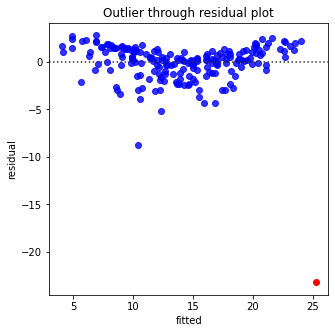

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
y_hat_flattened = y_hat.ravel()
sns.residplot(ax=ax, x=y_hat_flattened[:-1], y=(y-y_hat_flattened).iloc[:-1], lowess=False, scatter_kws={"color": "blue"})

plt.scatter(y_hat_flattened[-1], y.iloc[-1]-y_hat_flattened[-1], color='r')
ax.set_title('Outlier through residual plot')
ax.set_xlabel('fitted')
ax.set_ylabel('residual')

<p style="text-align:justify">How large should be the residual for the corresponding point to be diagnosed as an outlier? For example, the blue point with residual value close to $-10$ in the plot aboove also seems to be little far away from the other blue residuals. Is it not an outlier? To overcome this ambiguity, we can divide each residual by its standard error. This will make the normalized residual a student t-sample with $n-p$ degrees of freedom, called as studentized residual. If the absolute of normalized value is less than $3$ (i.e approximately $3$ standard errors/deviations from the mean $0$), then the point corresponding to the residual is not an outlier. Else, it is. There is another way of identifying outliers.</p>

<p style="text-align:justify">Suppose we look at the data point $(x^i, y^i)$. To check if it is an outlier, we can remove it from the data and fit the regression model. Then predict the value for this data point using this new model and compute the residual. This is called as deleted residual. If the point is an outlier, then the deleted residual value will be very large. But again, how large is large - the same question we posed in the above paragraph. To clear this ambiguity, we can normalize the deleted residual value by its standard error. Note that deleted residual is a statistic. This is because we can consider mutiple sets of sample data (from the same population) where each of them contains the point we are discussing about, and then delete from each set this point and compute the deleted residual. We have multiple deleted residuals for the same point, using which we can obtain its mean, variance and standard error. So, once we normalize the deleted residual by its standard error, the deleted residual follows the student t-distribution with $n-p-1$ degrees of freedom. This residual is called as external studentized residual. Based on this, if the observed external studentized residual is beyond $3$ or $-3$ in the absolute sense (i.e approximately more than $3$ standard errors/deviations away from mean $0$), then the corresponding point is deemed to be an outlier. The software will do this for us.</p>

Text(0, 0.5, 'external studentized residual')

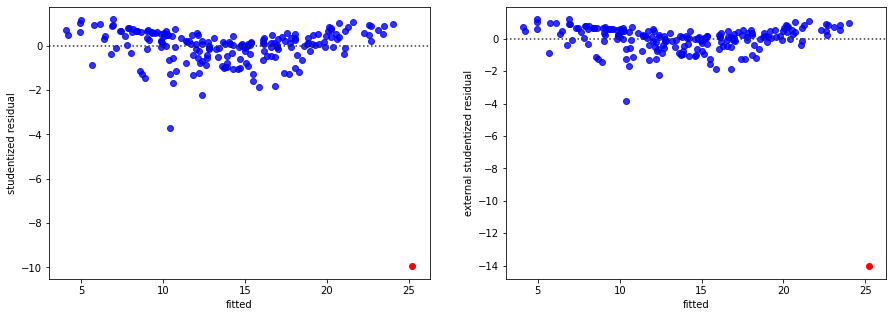

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence # OLSInfluence class contains info about influential points like outliers
influence = OLSInfluence(results)

#external_studentized_residuals = influence.resid_studentized_external()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# observe carefully the 2nd and 3rd arguments to sns.residplot
sns.residplot(ax=ax[0], x=y_hat.ravel()[:-1], y=influence.resid_studentized.iloc[:-1], lowess=False, scatter_kws={"color": "blue"})
ax[0].scatter(y_hat.ravel()[-1], influence.resid_studentized.iloc[-1], color='r')
ax[0].set_xlabel('fitted')
ax[0].set_ylabel('studentized residual')

sns.residplot(ax=ax[1], x=y_hat.ravel()[:-1], y=influence.resid_studentized_external.iloc[:-1], lowess=False, scatter_kws={"color": "blue"})
ax[1].scatter(y_hat.ravel()[-1], influence.resid_studentized_external.iloc[-1], color='r')
ax[1].set_xlabel('fitted')
ax[1].set_ylabel('external studentized residual')

<p style"text-align:justify">Both the plots suggest two points to be outliers - the added point corresponding to residual in red color and the point corresponding to the bottom-most blue colored residual. One way to deal with outliers is that if we are sure that they must have come due to error in data collection, they can be removed. However it may happen that the model does not contain the right predictor(s) which may result in large residuals for some points.</p>

<p style"text-align:justify">Let's remove the two points and see how the model performs. We already know, removing the outlier corresponding to red residual significantly improves the performance. Our main focus in the code below will be to see the effect of outlier corresponding to the largest blue residual (in the absolute sense).</p>

In [ ]:
second_largest_stud_residual_index = (influence.resid_studentized.iloc[:-1]).abs().argmax()

X = df.drop(["sales", "newspaper"], axis=1)
X = X.drop(index=second_largest_stud_residual_index) # drop the blue outlier predictor value
X = sm.add_constant(X) # prepend a column of 1's for intercept
y = df["sales"]
y = y.drop(index=second_largest_stud_residual_index) # drop the blue response predictor value

multi_lin_reg = sm.OLS(endog=y, exog=X)
results = multi_lin_reg.fit()

y_hat = np.array(X)@np.array(results.params).reshape(-1, 1)
RSS = np.sum((np.array(y)[:, None] - y_hat)**2)
RSE = np.sqrt(RSS/(n-3))

multi_lin_reg_df = pd.DataFrame(index=['a', 'b1', 'b2'], columns=['val', 'SE', '95% CI', 't-statistic', 'p-value'])
temp_dict = {"val":results.params.values, 'SE':results.bse.values, 't-statistic':results.tvalues.values, '95% CI':list(np.around(results.conf_int().values, decimals=3)), 
             'p-value':np.around(results.pvalues.values, decimals=3)}
multi_lin_reg_df = pd.DataFrame.from_dict(temp_dict)
multi_lin_reg_df.index=['a', 'b1', 'b2']
multi_lin_reg_df.index.name = 'coeff'
print(multi_lin_reg_df)
print("---------------------------------------------------------------")
print(f"RSE of the model: {RSE:.3f}")
print(f"R^2: {results.rsquared:.3f}")
print("---------------------------------------------------------------")



         val     SE  t-statistic          95% CI  p-value
coeff                                                    
a      3.019  0.274       11.022  [2.479, 3.559]      0.0
b1     0.045  0.001       34.452  [0.042, 0.047]      0.0
b2     0.192  0.007       25.588  [0.177, 0.206]      0.0
---------------------------------------------------------------
RSE of the model: 1.557
R^2: 0.909
---------------------------------------------------------------


<p style"text-align:justify">We can see that $RSE$ has decreased from $1.61$ to $1.56$ and $R^2$ has increased from $0.897$ to $0.91$. So, the model is only slighly better when trained on the data without the outlier corresponding to the bottom-most blue residual in the above plot. Hence, this outlier is not an influential outlier.</p>

## High Leverage Points
<p style="text-align:justify">These are the points which have anomalous predictor values. For example, the points marked red in the plots below are high leverage points (only the predictors are plotted). Note that, in the right plot, individually the predictors $x_1$ and $x_2$ are well within the range but the combined $(x_1, x_2)$ is not. The high leverage points may or may not influence the regression, like outliers. Further, while outliers are categorized based on response values, high leverage points are categorized based on predictor values. A point could be both an outlier and a high leverage point, which is dangerous.</p>

Text(0, 0.5, 'x2')

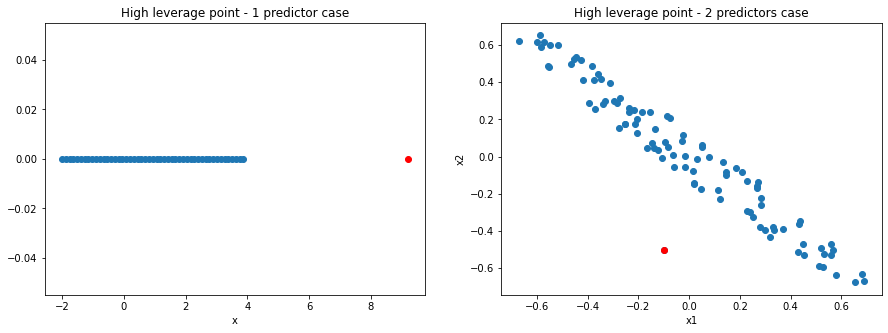

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# 1 predictor case
x = np.linspace(-2, 4, num=50)
x[-1] = 9.2 # add the high leverage point
ax[0].scatter(x[:-1], np.zeros(x.shape[0]-1))
ax[0].scatter(x[-1], 0, color='r')
ax[0].set_title("High leverage point - 1 predictor case")
ax[0].set_xlabel('x')

# 2 predictors case
x1Center = 0.
x2Center = 0.
x1Radius = 1.
x2Radius = .1
angle = np.pi/4
N = 100
# Generate points in the ellipse
t = 2*np.pi*np.random.rand(N)
d = np.sqrt(np.random.rand(N))
x1 = x1Center + x1Radius * d*np.cos(t)
x2 = x2Center + x2Radius * d*np.sin(t)
#rotate ellipse clockwise 45 degrees
x1_rot = np.cos(angle)*x1 + np.sin(angle)*x2
x2_rot = np.cos(angle)*x2 - np.sin(angle)*x1
# add high leverage point
x1_rot[-1] = -.1
x2_rot[-1] = -.5
#plot
ax[1].scatter(x1_rot, x2_rot)
ax[1].scatter(x1_rot[-1], x2_rot[-1], color='r')
ax[1].set_title("High leverage point - 2 predictors case")
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
#ax[1].set_xlim((-1, 1))
#ax[1].set_ylim((-1, 1))

<p style="text-align:justify">Consider the 1-predictor case. Let $y=.5x+\epsilon$ where $\epsilon=N(0, \sigma ^2)$. Let's see if the high leverage point influences the regression model in this case. </p>

<p style="text-align:justify">We can check in the plot below that the regression line for the data with leverage point is slightly pulled towards the leverage point. In this example, the influence is not significant. However, the idea is clear that a single high leverage point can distort the regression model, thereby affecting $RSE$, $R^2$, p-values etc. So, how do we find high leverage points in the data?</p>

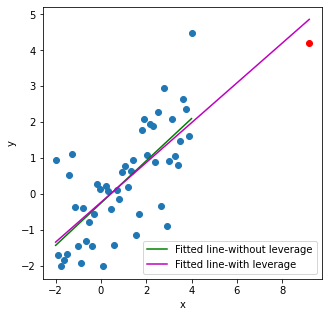

In [ ]:
lin_reg = linear_model.LinearRegression()

# first, we will fit without high leverage point
x_without_leverage = np.linspace(-2, 4, num=50)
y_without_leverage = .5*x + np.random.standard_normal(size=50)
lin_reg.fit(x_without_leverage.reshape(-1, 1), y_without_leverage)
y_hat_without_leverage = lin_reg.predict(x_without_leverage.reshape(-1, 1))

# with leverage
x_with_leverage = np.append(x_without_leverage, 9.2)
y_with_leverage = np.append(y_without_leverage, .5*9.2 + np.random.randn())
lin_reg.fit(x_with_leverage.reshape(-1, 1), y_with_leverage)
y_hat_with_leverage = lin_reg.predict(x_with_leverage.reshape(-1, 1))

plt.figure(figsize=(5, 5))
plt.scatter(x_without_leverage, y_without_leverage)
plt.scatter(x_with_leverage[-1], y_with_leverage[-1], color='r')
plt.plot(x_without_leverage, y_hat_without_leverage, color='g', label='Fitted line-without leverage')
plt.plot(x_with_leverage, y_hat_with_leverage, color='m', label='Fitted line-with leverage')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


<p style="text-align:justify"> To find high leverage points, we can use the leverage statistic. We know that in multivariate regression, $$\hat y = X(X^TX)^{-1}X^Ty$$ Let $H = X(X^TX)^{-1}X^T$ be the $n \times n$ projection matrix that projects into the space spanned by the $p$ predictors and the vectors of ones (note that $X$ is $n \times (p+1)$ matrix). Then, for the $i^{th}$ data point $x^i$, it's leverage statistic value is quantified by the $i^{th}$ diagonal element of $H$, denoted by $h_{ii}$. $H$ is called as hat matrix as it introduces hat on $y$. It can be shown that $h_{ii}$ is proportional to the distance of $x^i$ from $\bar x$. Further, $h_{ii}$ lies between 0 and 1. And, $\sum_{i=1}^{n}h_{ii}=p+1$. </p>

<p style="text-align:justify"> Given this leverage statistic, we can compute $$\bar h = \sum_{i=1}^{n}h_{ii} = \frac{p+1}{n}$$ </p>

Then we can say that $x^i$ is a high leverage point if $h_{ii} \gt 3 \bar h$.

Let's check if there are any high leverage points in the advertising data.

In [ ]:
X = df.drop(["sales", "newspaper"], axis=1)
X = sm.add_constant(X) # prepend a column of 1's for intercept
y = df["sales"]

multi_lin_reg = sm.OLS(endog=y, exog=X)
results = multi_lin_reg.fit()
influence = OLSInfluence(results)

p = 2
n = len(X)

high_leverage_points = (influence.hat_matrix_diag > 3*(p+1)/n).nonzero() #hat_matrix_diag contains h_ii's
print(high_leverage_points)

(array([], dtype=int64),)


So, none of the points in the advertising data are high leverage points. 

One way to deal with high leverage points is to remove them from the data.

## Collinearity
<p style="text-align:justify">If two or more predictors are correleated, we say that these predictors are collinear. Collinearity can result in wrong coefficient estimates. We have already seen correlation in case of newspaper budget and radio budget, though not very significant ($35\%$ only). Because of some correlation between them, the single variable model wrongly led to believe that newspaper budget influences sales. We detected this correlation using correlation matrix. However, correlation matrix can identify only pairwise correlations. It is possible for three or more predictors to be correlated with each other, even if no pair of predictors have significant correlation. This situation is called as multicollinearity. This can be detected by variance inflation factor ($VIF$). $VIF$ of the regression coefficient $\hat b_j$ is defined as $$VIF(\hat b_j)=\frac{\text{var of }\hat b_j\text{ in multivariate model}}{\text{var of }\hat b_j\text{ in the isolated model}}$$ This quantity is always lower bounded by $1$. If this quantity is larger than $5$ or $10$, it indicates the presence of multicollinearity. In such case the $j^{th}$ preditor variable can be dropped from the model. Another way is to combine collinear variables into a single variable (like taking mean of them). Yet another way is to decorrelate using principal component analysis (PCA) which we will study later. It is possible to show that $$VIF(\hat b_j)=\frac{1}{1-R^2_{x_j|x_{-j}}}$$ where $R^2_{x_j|x_{-j}}$ is the $R^2$ from a regression of $x_j$ onto all of the other predictors.</p>

Let's compute $VIF$'s for the linear regression model on advertising data.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #this method required for computing VIF's

X = df.drop(["sales"], axis=1)
X = sm.add_constant(X) # prepend a column of 1's for intercept
y = df["sales"]

multi_lin_reg = sm.OLS(endog=y, exog=X)
#results = multi_lin_reg.fit()
#influence = OLSInfluence(results)

p=3
print(f"VIF(a_hat): {variance_inflation_factor(np.array(X), 0)}")
for i in range(1, p+1):
  print(f"VIF(b_{i}_hat): {variance_inflation_factor(np.array(X), i)}")

VIF(a_hat): 6.848899953334954
VIF(b_1_hat): 1.00461078493965
VIF(b_2_hat): 1.1449519171055353
VIF(b_3_hat): 1.1451873787239288


The results above indicate there is no multicollinearity in advertising data. It does not show any correlation between newspaper budget and radio budget. But we had already detected a collinearity (pairwise correlation) earlier between newspaper budget and radio budget. Since the correlation was mild ($35\%$ only), it is not very significant (though not negligible) and hence not reflected in the $VIF$ score. 

So, we have had an extensive look at linear regression. We will now answer the questions we had posed right in the beginning. 

- Is there relationship between advertising budget and sales?<br>
&emsp;&emsp;Yes. F-statistic had very low p-value signifying relationship between advertising media and sales.

- How strong is the relationship?<br>
&emsp;&emsp;For this, we use $R^2$ which quantifies the amount of variance explained by the predictors. $R^2$ was $0.897$ indicating that around $90\%$ of variance is explained by the linear model, which is quite strong.

- Which media contribute to sales?<br>
&emsp;&emsp; We have seen from p-values corresponding to t-statistics of the coefficients in the multivariate model that TV and radio contribute to sales. Since p=3 is very small, this inference using t-statistics is reasonable.

- How accurately can we estimate the effect of each medium on sales?<br>
&emsp;&emsp; $\$1000$ increase in TV budget, keeping radio and newspaper budget fixed increases sales between 43 and 49 units (based on $CI$). Similarly,  $\$1000$ increase in radio budget, keeping TV budget fixed increases sales between 172 and 189 units. Note that in the previous line, we did not say newspaper budget is fixed since radio and newspaper budget are correlated (non-negligibly though not very significant) and so any change in radio budget would somewhat affect the newspaper budget also. 

- How accurately can we predict future sales?<br>
&emsp;&emsp; The accuracy of average sales prediction for a given TV and radio budget is quantified by the sales confidence interval. The accuracy of predicition in each market is quantified by the corresponding prediction interval.

- Is the relationship linear?<br>
&emsp;&emsp; No. The residual plots suggested non-linearity. In fact, adding the interaction between TV budget and radio budget improved the model.

- Is there interaction among advertising media?<br>
&emsp;&emsp;Yes. Between TV and radio budget.
